In [21]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

In [22]:
import models as m
import data as d
import training as t

In [23]:
if torch.cuda.is_available():
    device = torch.device("cuda:0")
elif torch.backends.mps.is_available():
    device = torch.device("mps")
else:
    device = torch.device("cpu")

print(device)

cuda:0


In [4]:
torch.manual_seed(0)

In [5]:
torch.backends.cudnn.benchmark = True

In [24]:
channel_size = 64

starting_epoch = 1259
batch_size = 16
learning_rate = 5 * 1e-5

In [7]:
dataloader, dataset = d.create_custom_data_loader(channel_size=channel_size, dir_path='dataset', num_workers=0, batch_size=batch_size)

In [8]:
X_batch, y_batch = next(iter(dataloader))

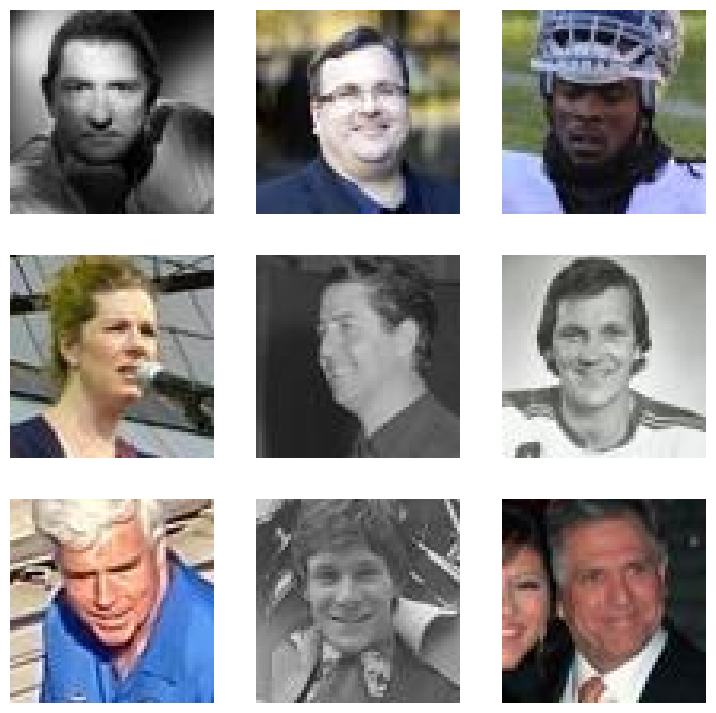

In [9]:
d.show_tensor_images(X_batch[:9])

In [10]:
discriminator, generator = m.create_models(channel_size=channel_size, device=device)

optimizer_d = optim.Adam(discriminator.parameters(), lr=learning_rate)
optimizer_g = optim.Adam(generator.parameters(), lr=learning_rate)

path = f"models/checkpoint_epoch_{starting_epoch}.pth"

In [11]:
t.load_models(discriminator, optimizer_d, generator, optimizer_g, path)
for g in optimizer_d.param_groups:
    g['lr'] = learning_rate

for g in optimizer_g.param_groups:
    g['lr'] = learning_rate

In [12]:
num_epochs = 5000

verbose = 60
checkpoint = 60

In [13]:
t.custom_training(generator=generator, optimizer_g=optimizer_g, discriminator=discriminator, data_loader=dataloader, optimizer_d=optimizer_d,
                  batch_size=batch_size, start_epoch=starting_epoch, num_epochs=num_epochs, verbose=verbose, checkpoint=checkpoint, device=device, criterion=nn.BCELoss(),
                  latent_dim=64)

START


Epochs 1260-1319/6259:   1%|▏         | 124/8340 [00:37<17:15,  7.94batch/s, D_loss=0.755, G_loss=1.14] 

KeyboardInterrupt: 

In [25]:
gen = generator(torch.randn(36, channel_size).cpu().detach())

RuntimeError: CUDA error: unknown error
CUDA kernel errors might be asynchronously reported at some other API call, so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1.
Compile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.


In [ ]:
gen = gen.cpu()
d.show_tensor_images(gen.detach(), to_cpu=False)